## Start code: 

In [1]:
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Summary Statistics
Summary statistics are the numbers that summarize properties of the data. Summarized properties include frequency, location, and spread. Most summary statistics can be calculated in a single pass through the data. There are multiple ways to obtain summary statistics for your data in Python. Below, we will demonstrate how to do so using pandas and NumPy. First, we import both of these libraries:

In [2]:
import pandas as pd
import numpy as np

Next, we generate two illustrative datasets from which we can generate summary statistics:

In [3]:
# Defines an n-dimensional array (ndarray) with 10,000 random numbers in the range [0-500).
values1 = np.random.randint(500, size=10000) 

# Defines a pandas Series similar to the above ndarray.
values2 = pd.Series(np.random.randint(500, size=10000))

In [4]:
print(values1)

[408 323 289 ... 227  74 284]


In [5]:
print(values2)

0       302
1        33
2       445
3       245
4       210
       ... 
9995    196
9996    167
9997    487
9998    101
9999    393
Length: 10000, dtype: int64



pandas series are implemented as labeled ndarrays, and hence all statistical methods available for ndarrays can be used with this data structure as well. Below, see the first 10 elements generated for each list of values (note the explicit indexing displayed in the pandas series):

In [6]:
values1[:10]

array([408, 323, 289,  71, 267, 189,  32, 116, 217, 183])

In [7]:
values2[-10:]

9990    314
9991    197
9992    414
9993    365
9994    491
9995    196
9996    167
9997    487
9998    101
9999    393
dtype: int64

Built-in methods are available for all basic statistics. Some are demonstrated below:

In [8]:
print ('MIN(values1) = ' + str(values1.min()) + '\t\t\tMIN(values2) = ' + str(values2.min())) # minimum value in the list
print ('MAX(values1) = ' + str(values1.max()) + '\t\t\tMAX(values2) = ' + str(values2.max())) # maximum value
print ('RANGE(values1) = ' + str(values1.ptp()) + '\t\t\tRANGE(values2) = ' + str(np.ptp(values2))) # the range of the values
print ('MEAN(values1) = ' + str(values1.mean()) + '\t\tMEAN(values2) = ' + str(values2.mean())) # the mean of the values
print ('STD(values1) = ' + str(values1.std()) + '\tSTD(values2) = ' + str(values2.std())) # the standard deviation of the values
print ('VARIANCE(values1) = ' + str(values1.var()) + '\tVARIANCE(values2) = ' + str(values2.var())) # the variance of

MIN(values1) = 0			MIN(values2) = 0
MAX(values1) = 499			MAX(values2) = 499
RANGE(values1) = 499			RANGE(values2) = 499
MEAN(values1) = 249.4783		MEAN(values2) = 247.6296
STD(values1) = 145.11864638670662	STD(values2) = 144.9144831429299
VARIANCE(values1) = 21059.42152911	VARIANCE(values2) = 21000.20742458251


Additionally, pandas series have a method called describe() that returns a nice summary of these basic statistics.

In [9]:
values2.describe()

count    10000.000000
mean       247.629600
std        144.914483
min          0.000000
25%        119.000000
50%        247.500000
75%        373.000000
max        499.000000
dtype: float64

For non-numerical series objects, describe() will return a simple summary of the number of unique values and most frequently occurring ones.

In [10]:
s = pd.Series(['a', 'a', 'b', 'b', 'a', 'a', np.nan, 'c', 'd', 'a'])

In [11]:
s.describe()

count     9
unique    4
top       a
freq      5
dtype: object

np.nan is used to denote missing values. By default, the statistical methods implemented in pandas skip these values, which is not always the case when we are dealing with ndarrays. This behavior can be altered by including the skipna=False flag when calling a method.

### Handling missing data with pandas
pandas has great support for missing data. For full documentation, check this page. Below are a few examples of how to work with missing data using pandas. First, we create a pandas DataFrame with 5 rows and 3 columns and fill it with random numbers:

In [12]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'], columns=['one', 'two', 'three'])

In [13]:
df

,one,two,three
a,-0.439412,0.974867,-1.510808
c,1.884613,1.841933,0.014964
e,1.372240,-0.225294,-1.183412
f,1.107638,1.415898,0.078621
h,-0.091141,0.519107,0.324826


Next, we add two more columns, named 'four' and 'five':

In [14]:
df['four'] = 'bar'
df['five'] = df['one'] > 0

In [15]:
df

,one,two,three,four,five
a,-0.439412,0.974867,-1.510808,bar,False
c,1.884613,1.841933,0.014964,bar,True
e,1.372240,-0.225294,-1.183412,bar,True
f,1.107638,1.415898,0.078621,bar,True
h,-0.091141,0.519107,0.324826,bar,False


Adding new rows is also simple. Below we include three extra empty rows:

In [16]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three,four,five
a,-0.439412,0.974867,-1.510808,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,1.884613,1.841933,0.014964,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,1.372240,-0.225294,-1.183412,bar,True
f,1.107638,1.415898,0.078621,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,-0.091141,0.519107,0.324826,bar,False


In [17]:
#This is one way to index a column in pandas
df2['one']

a   -0.439412
b         NaN
c    1.884613
d         NaN
e    1.372240
f    1.107638
g         NaN
h   -0.091141
Name: one, dtype: float64

In [18]:
#This is one way to index a row in pandas
df2.loc['a']

one     -0.439412
two      0.974867
three    -1.51081
four          bar
five        False
Name: a, dtype: object

pandas has two functions isnull() and notnull() that return boolean objects when called.

In [19]:
pd.isnull(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [20]:
pd.notnull(df2['one'])

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool

Missing values propagate naturally through arithmetic operations between pandas objects.

In [21]:
a = df[['one','two']]
a

,one,two
a,-0.439412,0.974867
c,1.884613,1.841933
e,1.372240,-0.225294
f,1.107638,1.415898
h,-0.091141,0.519107


In [22]:
a.loc[['a','c'],'one'] = float('nan')
a

,one,two
a,NaN,0.974867
c,NaN,1.841933
e,1.372240,-0.225294
f,1.107638,1.415898
h,-0.091141,0.519107


In [23]:
b = df[['one','two']]
b

,one,two
a,-0.439412,0.974867
c,1.884613,1.841933
e,1.372240,-0.225294
f,1.107638,1.415898
h,-0.091141,0.519107


In [24]:
a * b

,one,two
a,NaN,0.950367
c,NaN,3.392717
e,1.883044,0.050757
f,1.226861,2.004766
h,0.008307,0.269472


In [25]:
a['one'].dropna()

e    1.372240
f    1.107638
h   -0.091141
Name: one, dtype: float64

In pandas, summary statistics all account for missing values.

When summing data, NA (missing) values will be treated as zero
If the data are all NA, the result will be NA
Methods like cumsum and cumprod ignore NA values, but preserve them in the resulting arrays

In [26]:
a

,one,two
a,NaN,0.974867
c,NaN,1.841933
e,1.372240,-0.225294
f,1.107638,1.415898
h,-0.091141,0.519107


In [27]:
a['one'].sum()

2.388736997564047

In [28]:
a.mean(1)

a    0.974867
c    1.841933
e    0.573473
f    1.261768
h    0.213983
dtype: float64

This is just the bare minimum. pandas has a lot more missing data functionality.

### Histograms
#### Using pandas
Plotting histograms using pandas is quite straightforward. Using the above values2 series, we can simply call the hist() method.

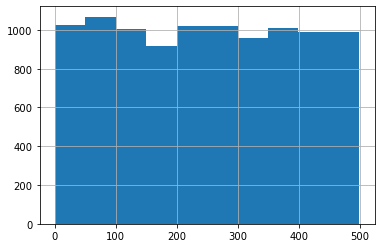

In [29]:
pdhist = values2.hist()

Parameters can be used to change the number of bins, color, transparency, etc.

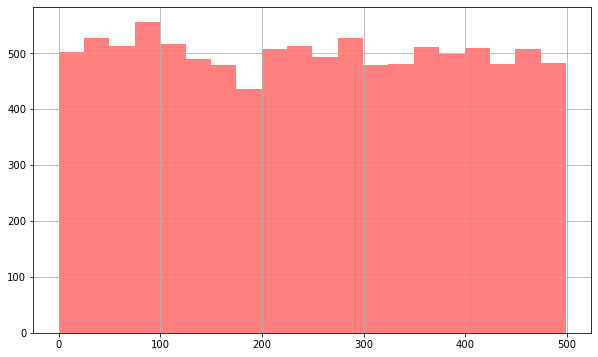

In [30]:
pdhist2 = values2.hist(bins=20, color='r',alpha=0.5, figsize=(10,6))

### Using NumPy + matplotlib
While the pandas data structure has a method that automatically wraps around a call to the hist() method of the plotting library Matplotlib, we can achieve the same result by performing that call manually on our values1 ndarray.

In [31]:
import matplotlib.pyplot as plt # Required for plotting

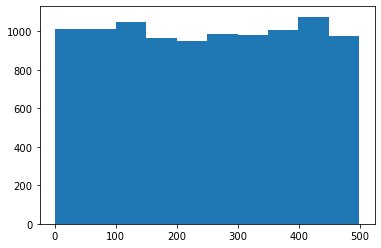

In [32]:
nphist = plt.hist(values1)

### Boxplots
#### Using pandas
pandas DataFrames have a boxplot method that allows you to visualize the distribution of values within each column.

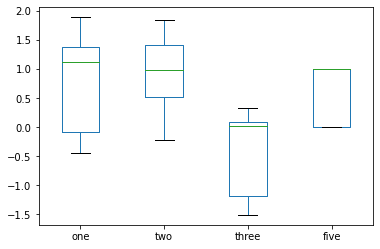

In [33]:
box = df.boxplot(grid=False, return_type='axes')

#### Using NumPy + matplotlib

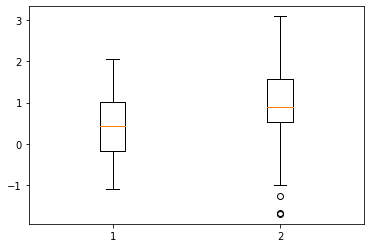

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

x1 = np.random.normal(0,1,50)
x2 = np.random.normal(1,1,50)

npbox = ax.boxplot([x1,x2])

### Scatterplots
#### Using pandas
Let's define a dataframe containing 2 columns, each with 200 random numbers < 1.

In [35]:
df = pd.DataFrame(rand(200,2))

In [36]:
df.head()

,0,1
0,0.434932,0.158366
1,0.606253,0.953038
2,0.200735,0.867830
3,0.424045,0.129408
4,0.054417,0.346117


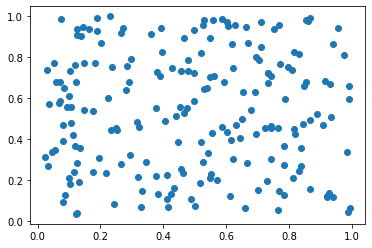

In [37]:
pdscatter = plt.scatter(df[0], df[1])

#### Using NumPy + matplotlib

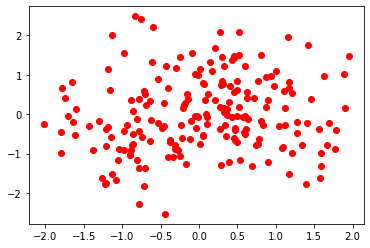

In [38]:
x = np.random.randn(200)
y = np.random.randn(200)

fig = plt.figure()
ax = fig.add_subplot(111)

npscatter = ax.scatter(x,y,color='r')

## My work:
___
### Part 1

In [41]:
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=["Sepal Length", "Sepal Width",
"Petal Length", "Petal Width",
"Name"])

In [42]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### How many features are there and what are their types (e.g., numeric, nominal)?
There are four features. They are all numeric values.

----
#### Compute and display summary statistics for each numeric feature available in the dataset. 
These must include the minimum value, maximum value, mean, standard deviation, count, and 25:50:75% percentiles.

In [43]:
print ('MIN(Sepal Length) = ' + str(df['Sepal Length'].min()))
print ('MAX(Sepal Length) = ' + str(df['Sepal Length'].max()))
print ('MEAN(Sepal Length) = ' + str(df['Sepal Length'].mean()))
print ('STD(Sepal Length) = ' + str(df['Sepal Length'].std()))
print ('COUNT(Sepal Length) = ' + str(df['Sepal Length'].count()))
print ('PERCENTILES(Sepal Length) = ')
print (str(df['Sepal Length'].quantile([.25, .5, .75])))

MIN(Sepal Length) = 4.3
MAX(Sepal Length) = 7.9
MEAN(Sepal Length) = 5.843333333333335
STD(Sepal Length) = 0.8280661279778629
COUNT(Sepal Length) = 150
PERCENTILES(Sepal Length) = 
0.25    5.1
0.50    5.8
0.75    6.4
Name: Sepal Length, dtype: float64


In [44]:
print ('MIN(Sepal Width) = ' + str(df['Sepal Width'].min()))
print ('MAX(Sepal Width) = ' + str(df['Sepal Width'].max()))
print ('MEAN(Sepal Width) = ' + str(df['Sepal Width'].mean()))
print ('STD(Sepal Width) = ' + str(df['Sepal Width'].std()))
print ('COUNT(Sepal Width) = ' + str(df['Sepal Width'].count()))
print ('PERCENTILES(Sepal Width) = ')
print (str(df['Sepal Width'].quantile([.25, .5, .75])))

MIN(Sepal Width) = 2.0
MAX(Sepal Width) = 4.4
MEAN(Sepal Width) = 3.0540000000000007
STD(Sepal Width) = 0.4335943113621737
COUNT(Sepal Width) = 150
PERCENTILES(Sepal Width) = 
0.25    2.8
0.50    3.0
0.75    3.3
Name: Sepal Width, dtype: float64


In [45]:
print ('MIN(Petal Length) = ' + str(df['Petal Length'].min()))
print ('MAX(Petal Length) = ' + str(df['Petal Length'].max()))
print ('MEAN(Petal Length) = ' + str(df['Petal Length'].mean()))
print ('STD(Petal Length) = ' + str(df['Petal Length'].std()))
print ('COUNT(Petal Length) = ' + str(df['Petal Length'].count()))
print ('PERCENTILES(Petal Length) = ')
print (str(df['Petal Length'].quantile([.25, .5, .75])))

MIN(Petal Length) = 1.0
MAX(Petal Length) = 6.9
MEAN(Petal Length) = 3.7586666666666693
STD(Petal Length) = 1.7644204199522617
COUNT(Petal Length) = 150
PERCENTILES(Petal Length) = 
0.25    1.60
0.50    4.35
0.75    5.10
Name: Petal Length, dtype: float64


In [46]:
print ('MIN(Petal Width) = ' + str(df['Petal Width'].min()))
print ('MAX(Petal Width) = ' + str(df['Petal Width'].max()))
print ('MEAN(Petal Width) = ' + str(df['Petal Width'].mean()))
print ('STD(Petal Width) = ' + str(df['Petal Width'].std()))
print ('COUNT(Petal Width) = ' + str(df['Petal Width'].count()))
print ('PERCENTILES(Petal Width) = ')
print (str(df['Petal Width'].quantile([.25, .5, .75])))

MIN(Petal Width) = 0.1
MAX(Petal Width) = 2.5
MEAN(Petal Width) = 1.1986666666666672
STD(Petal Width) = 0.7631607417008414
COUNT(Petal Width) = 150
PERCENTILES(Petal Width) = 
0.25    0.3
0.50    1.3
0.75    1.8
Name: Petal Width, dtype: float64


#### Data Visualization: Histograms
You may plot each histogram individually or combine them all into a single
plot. When generating histograms for this assignment, use the default number of bins.

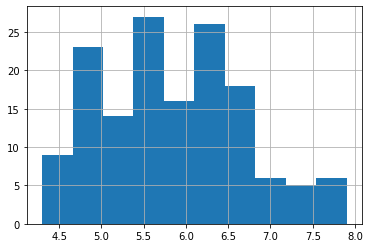

In [47]:
hist_sepal_length = df['Sepal Length'].hist()

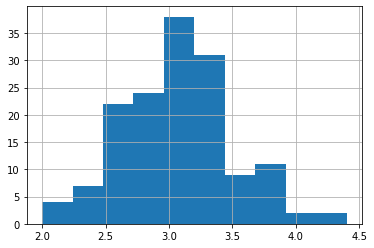

In [48]:
hist_sepal_width = df['Sepal Width'].hist()

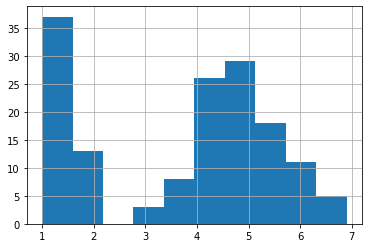

In [49]:
hist_petal_length = df['Petal Length'].hist()

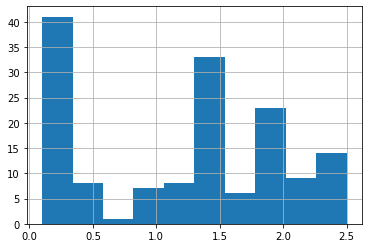

In [50]:
hist_petal_width = df['Petal Width'].hist()

#### Data Visualization: Box Plots
All of the box plots will be combined into a single plot.

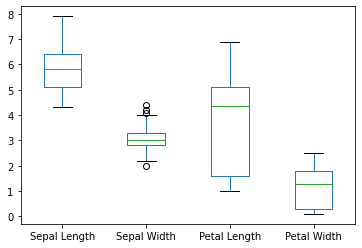

In [51]:
box = df.boxplot(grid=False, return_type='axes')

___
### Part 2

In [88]:
import pandas as pd
pd.set_option("display.max_columns", 100)
url = "https://raw.githubusercontent.com/cs6220/cs6220.spring2019/master/data/AmesHousing.txt"
df = pd.read_csv(url, sep="\t")

In [89]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


#### 1. How many features have missing values?

In [90]:
count = 0
for column in df: 
    if (df[column].isnull().sum() != 0):
        count += 1
print(count)

27


#### 2. Fill each missing nominal feature value with the string "Missing".

In [91]:
from pandas.api.types import is_string_dtype
for column in df:
    if is_string_dtype(df[column]):
        df1 = df[column].fillna('Missing')
        df[column] = df1
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,Missing,Missing,Missing,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,Missing,Missing,Missing,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,Missing,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,Missing,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,Missing,GdPrv,Missing,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,Missing,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,Missing,MnPrv,Missing,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,Hd

#### 3. Interpolate each missing numeric feature value using linear interpolation.

In [92]:
from pandas.api.types import is_numeric_dtype
for column in df:
    if is_numeric_dtype(df[column]):
        df1 = df[column].interpolate(method='linear')
        df[column] = df1
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,Missing,Missing,Missing,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,Missing,Missing,Missing,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,Missing,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,Missing,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,Missing,GdPrv,Missing,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,49.5,8885,Pave,Missing,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,Missing,MnPrv,Missing,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,H

#### 4. Standardize the imputed feature data so that the values of each numeric feature are standard normally distributed (i.e., each feature is Gaussian with zero mean and unit variance).

When doing the standardization, I excluded the column "Order" and "PID". Because from my observation, "Order" column is just used to number each row and "PID" is just like an id assigned to each instance, so I don't think they should be counted as a feature. Also, I compared the box plot results. Without "Order" and "PID", it has better data distribution. 

In [93]:
data = df.select_dtypes(exclude=['object']).drop(['Order', 'PID'], axis=1)
data.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900


Box plots before standardization

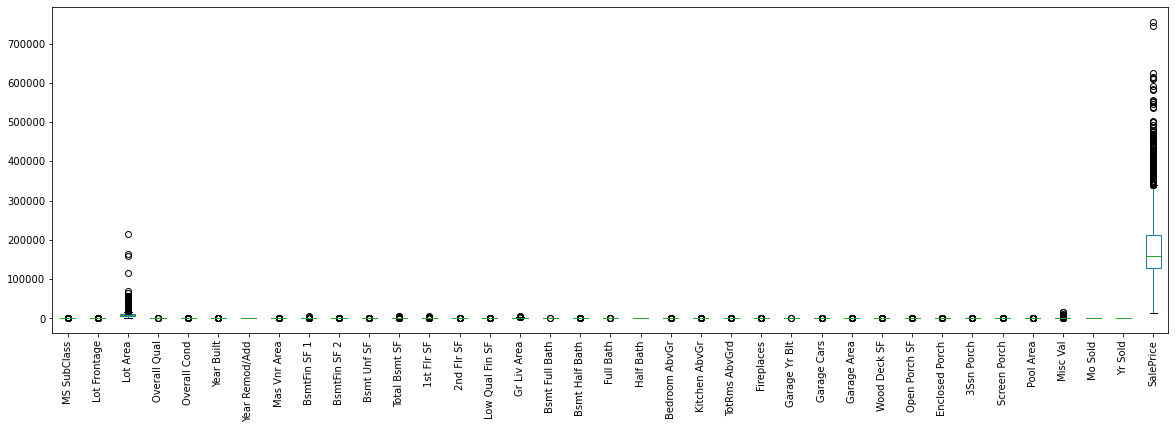

In [94]:
box = data.boxplot(grid=False, return_type='axes', figsize=(20,6), rot=90)

In [95]:
import sklearn
from sklearn import preprocessing

res = sklearn.preprocessing.scale(data, axis=0, with_mean=True, with_std=True, copy=True)
res

array([[-0.87700484,  3.12874389,  2.74438073, ..., -0.44805744,
         1.678499  ,  0.42822875],
       [-0.87700484,  0.45972069,  0.18709726, ..., -0.07960156,
         1.678499  , -0.94895652],
       [-0.87700484,  0.50347517,  0.5228137 , ..., -0.07960156,
         1.678499  , -0.11012549],
       ...,
       [ 0.64771625, -0.32785993,  0.03719892, ...,  0.28885432,
        -1.36011828, -0.61092014],
       [-0.87700484,  0.32845726, -0.01750572, ..., -0.81651332,
        -1.36011828, -0.13516523],
       [ 0.06128506,  0.19719382, -0.06611797, ...,  1.76267783,
        -1.36011828,  0.09019236]])

In [96]:
for ind in data.index:
    data.iloc[ind] = res[ind]
data.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,-0.877005,3.128744,2.744381,-0.067254,-0.506718,-0.375537,-1.163488,0.056729,0.431399,-0.293918,-0.269181,0.064758,1.267003,-0.783185,-0.101005,0.309265,1.082555,-0.249782,-1.024793,-0.755203,0.176094,-0.207291,0.354167,2.162180,-0.670221,0.30699,0.257066,0.920121,0.214409,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,1.678499,0.428229
1,-0.877005,0.459721,0.187097,-0.776079,0.393091,-0.342468,-1.115542,-0.570422,0.055976,0.557582,-0.658397,-0.384699,-0.672643,-0.783185,-0.101005,-1.194427,-0.822482,-0.249782,-1.024793,-0.755203,-1.032234,-0.207291,-0.917535,-0.925143,-0.631305,-1.00804,1.196425,0.366061,-0.704493,-0.358838,-0.103134,1.854530,-0.063031,-0.089422,-0.079602,1.678499,-0.948957
2,-0.877005,0.503475,0.522814,-0.067254,0.393091,-0.441674,-1.259380,0.034330,1.054908,-0.293918,-0.348845,0.629983,0.432445,-0.783185,-0.101005,-0.337718,-0.822482,-0.249782,-1.024793,1.234675,0.176094,-0.207291,-0.281684,-0.925143,-0.748052,-1.00804,-0.747397,2.368594,-0.170937,-0.358838,-0.103134,-0.285354,-0.063031,21.985725,-0.079602,1.678499,-0.110125
3,-0.877005,1.028529,0.128458,0.641571,-0.506718,-0.110988,-0.779919,-0.570422,1.366663,-0.293918,1.105596,2.402840,2.425687,-0.783185,-0.101005,1.207523,1.082555,-0.249782,0.784028,1.234675,0.176094,-0.207291,0.990018,2.162180,-0.358895,0.30699,0.229164,-0.742060,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,1.678499,0.791305
4,0.061285,0.197194,0.467348,-0.776079,-0.506718,0.848000,0.658466,-0.570422,0.765108,-0.293918,-0.961121,-0.280280,-0.590974,0.853432,-0.101005,0.255844,-0.822482,-0.249782,0.784028,1.234675,0.176094,-0.207291,-0.281684,0.618518,0.769662,0.30699,0.043152,0.935952,-0.200579,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.184969,1.678499,0.113980


#### 5. Visualize the results using box plots. 

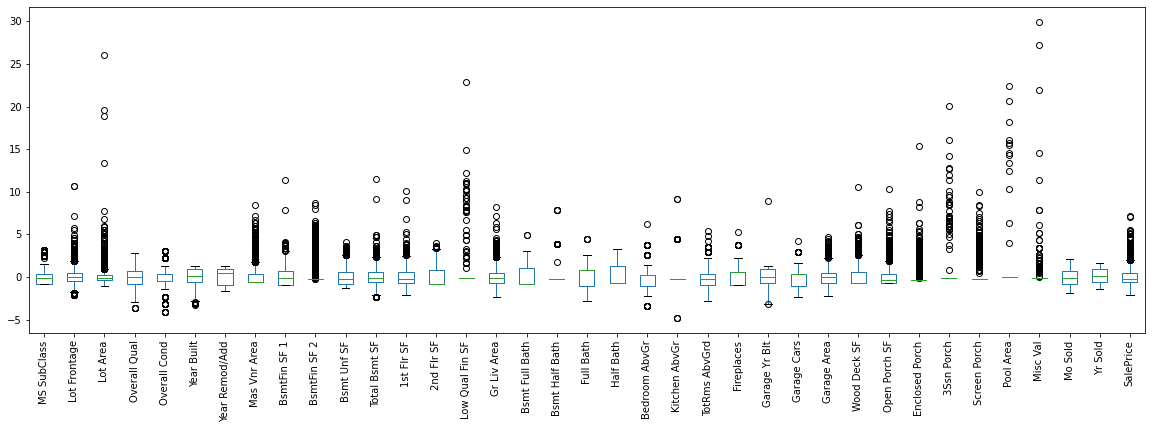

In [97]:
box = data.boxplot(grid=False, return_type='axes', figsize=(20,6), rot=90)

- How do the plots differ from box plots made before feature standardization?

The current plot can better displays the distribution of data. In previous plot, the data distribution of some features even can't be displayed as we have different units for each feature. When features are measured at different scales, it may bring a bais to our data analysis. 

- Which feature has the outlier furthest from the mean before and after standardization?

Before standardization: "SalePrice" has the furthest outlier.  
After standardization: "Misc Val" has the furthest outlier.

It further indicates that when features are measured at different scales, it will bring a bais to our analysis.

#### 6. To get an idea of their relative importance, estimate the mutual information between the numeric features and the class column, "SalePrice".

In [102]:
from sklearn import feature_selection
mutual_info = sklearn.feature_selection.mutual_info_regression(data, data['SalePrice'], discrete_features='auto', n_neighbors=3, copy=True, random_state=None)

features = list(data)
list_of_tuples = list(zip(features, mutual_info))  

new_df = pd.DataFrame(list_of_tuples, 
                  columns = ['Features', 'Relation_with_SalePrice'])  
new_df.head()


,Features,Relation_with_SalePrice
0,MS SubClass,0.303487
1,Lot Frontage,0.206330
2,Lot Area,0.167900
3,Overall Qual,0.593093
4,Overall Cond,0.117986


#### 7. What are the top 5 numeric features ranked by mutual information? Note that features with a higher estimated mutual information are considered more informative.

In [76]:
new_df.sort_values(by=['Relation_with_SalePrice'], ascending=False).head(6)

,Features,Relation_with_SalePrice
36,SalePrice,5.932440
3,Overall Qual,0.599579
15,Gr Liv Area,0.495626
26,Garage Area,0.415483
5,Year Built,0.400767
11,Total Bsmt SF,0.390504


The top 5 numeric features ranked by mutual information are (excluding 'SalePrice' itself):   
- Overall Qual  
- Gr Liv Area	  
- Garage Area  
- Year Built
- Total Bsmt SF

#### 8. How do you expect the values for the top-ranked feature to affect the sales price (i.e., would you expect the sales price to increase when its values go up or down)? Why?

Mutual information tells us how much one variable "related" to another variable. After filter the top 5 features, we can further calculate their correlation value to decide if they are positive related or negative related.
[Reference](https://eng.libretexts.org/Bookshelves/Industrial_and_Systems_Engineering/Book%3A_Chemical_Process_Dynamics_and_Controls_(Woolf)/13%3A_Statistics_and_Probability_Background/13.13%3A_Correlation_and_Mutual_Information)

In [77]:
correlation = df['Overall Qual'].corr(df['SalePrice'])
print(correlation)

0.7992617947690227


<AxesSubplot:xlabel='Overall Qual'>

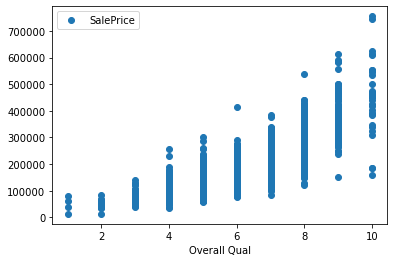

In [78]:
df.plot(x='Overall Qual', y='SalePrice', style=['o'])

"Overall Qual" and "SalePrice" are positive related, so I think the sales price increases when the value of Overall Qual goes up.

In [79]:
correlation = df['Gr Liv Area'].corr(df['SalePrice'])
print(correlation)

0.7067799209766279


<AxesSubplot:xlabel='Gr Liv Area'>

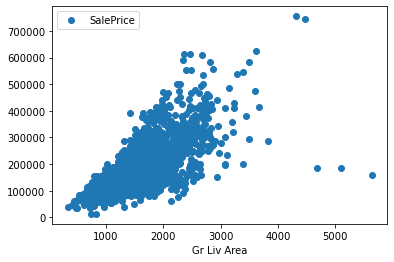

In [80]:
df.plot(x='Gr Liv Area', y='SalePrice', style=['o'])

"Gr Liv Area" and "SalePrice" are positive related, so I think the sales price increases when the value of Gr Liv Area goes up.

In [81]:
correlation = df['Garage Area'].corr(df['SalePrice'])
print(correlation)

0.6403583363025297


<AxesSubplot:xlabel='Garage Area'>

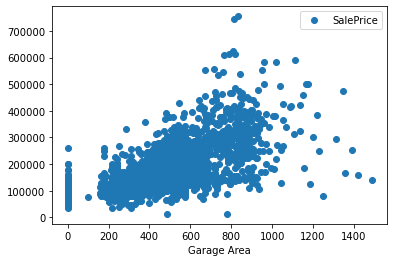

In [82]:
df.plot(x='Garage Area', y='SalePrice', style=['o'])

"Garage Area" and "SalePrice" are positive related, so I think the sales price increases when the value of Garage Area goes up.

In [83]:
correlation = df['Year Built'].corr(df['SalePrice'])
print(correlation)

0.5584261057120454


<AxesSubplot:xlabel='Year Built'>

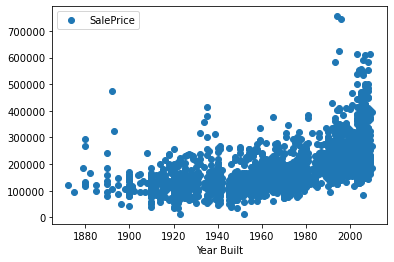

In [84]:
df.plot(x='Year Built', y='SalePrice', style=['o'])

"Year Built" and "SalePrice" are positive related, so I think the sales price increases when the value of Year Built goes up.

In [85]:
correlation = df['Total Bsmt SF'].corr(df['SalePrice'])
print(correlation)

0.6324202894012977


<AxesSubplot:xlabel='Total Bsmt SF'>

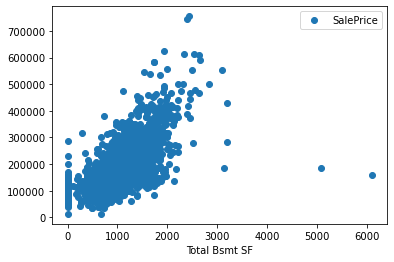

In [86]:
df.plot(x='Total Bsmt SF', y='SalePrice', style=['o'])

"Total Bsmt SF" and "SalePrice" are positive related, so I think the sales price increases when the value of Total Bsmt SF goes up.